In [1]:
%matplotlib notebook

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import psana
from tqdm import tqdm
from utilities import *

In [8]:
ls /sdf/data/lcls/ds/xpp/xppl1001021/hdf5/smalldata/

cube/                   xppl1001021_Run0039.h5  xppl1001021_Run0061.h5
jungfrau/               xppl1001021_Run0040.h5  xppl1001021_Run0062.h5
xppl1001021_Run0002.h5  xppl1001021_Run0041.h5  xppl1001021_Run0063.h5
xppl1001021_Run0003.h5  xppl1001021_Run0042.h5  xppl1001021_Run0064.h5
xppl1001021_Run0004.h5  xppl1001021_Run0043.h5  xppl1001021_Run0065.h5
xppl1001021_Run0005.h5  xppl1001021_Run0044.h5  xppl1001021_Run0066.h5
xppl1001021_Run0009.h5  xppl1001021_Run0045.h5  xppl1001021_Run0067.h5
xppl1001021_Run0010.h5  xppl1001021_Run0046.h5  xppl1001021_Run0068.h5
xppl1001021_Run0011.h5  xppl1001021_Run0047.h5  xppl1001021_Run0069.h5
xppl1001021_Run0012.h5  xppl1001021_Run0048.h5  xppl1001021_Run0070.h5
xppl1001021_Run0014.h5  xppl1001021_Run0049.h5  xppl1001021_Run0071.h5
xppl1001021_Run0015.h5  xppl1001021_Run0050.h5  xppl1001021_Run0072.h5
xppl1001021_Run0024.h5  xppl1001021_Run0051.h5  xppl1001021_Run0073.h5
xppl1001021_Run0029.h5  xppl1001021_Run0052.h5  xppl1001021_Run0074.h5
xppl10

In [20]:
run = 80
ds = psana.MPIDataSource('exp=xppl1001021:run={}:smd'.format(run))
#ds.break_after(100) # stop iteration after 3 events (break statements do not work reliably with MPIDataSource).
detname = 'epix_alc5'
det = psana.Detector(detname) 
nimg = 100
for nevt,evt in tqdm(enumerate(ds.events())):
    if nevt == nimg: break
    img = det.image(evt)
    if nevt == 0:
        imgs = np.zeros(np.r_[nimg, img.shape])
    imgs[nevt] = det.image(evt)
    
    

100it [00:09, 10.69it/s]


<IPython.core.display.Javascript object>


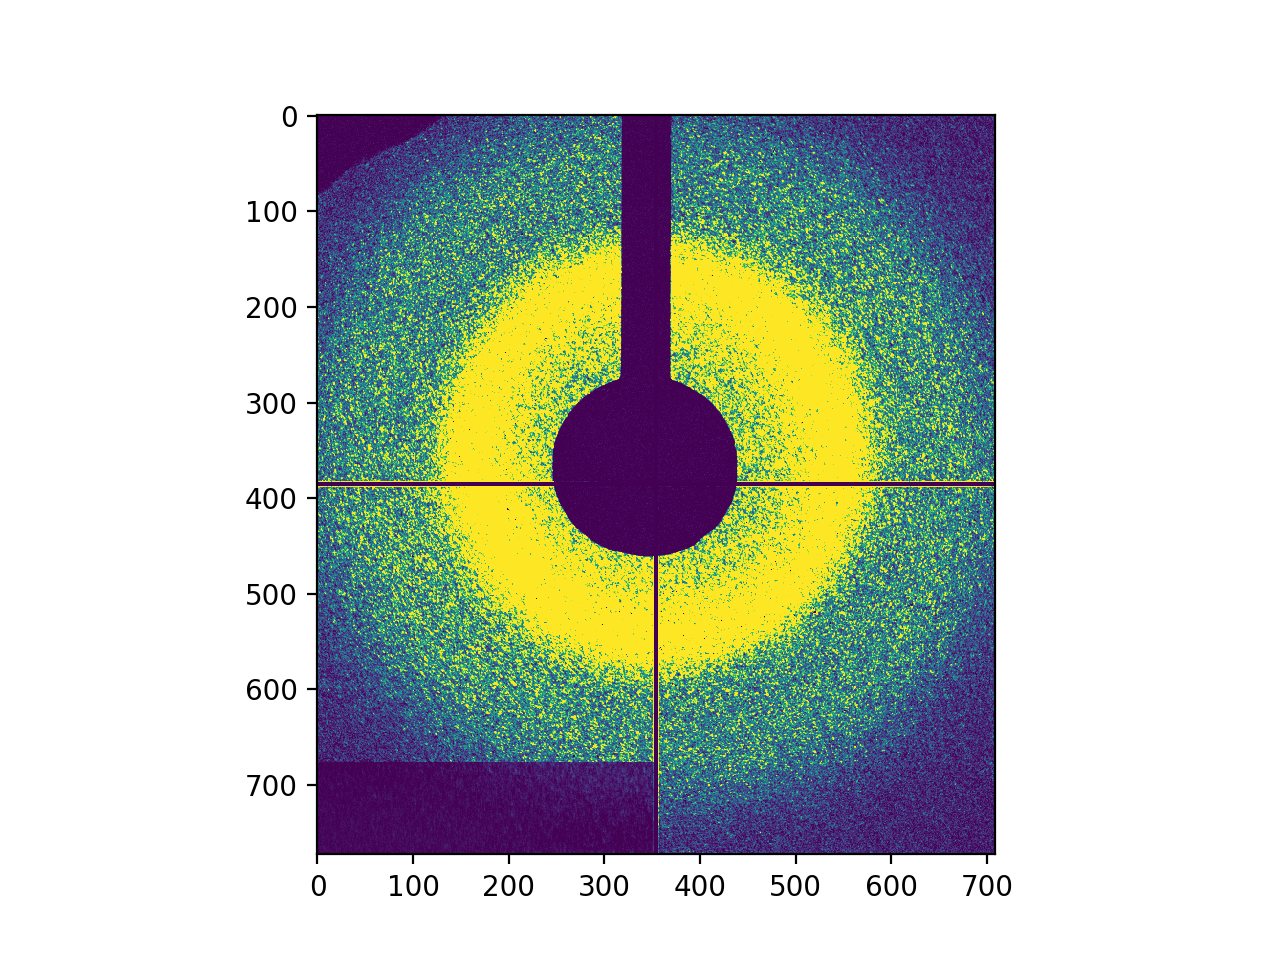

TypeError: ones() missing 1 required positional argument: 'shape'

In [21]:
plt.figure()
plt.imshow(imgs.mean(axis = 0),vmin=0,vmax=2,interpolation='none')
#np.save('/sdf/data/lcls/ds/xpp/xppl1001021/results/mb/npys/epix5_run80_2.npy',imgs.mean(axis = 0))



mask=np.ones()



In [33]:
square=imgs[:,440:440+70,440:440+70]

In [48]:
import scipy


In [75]:
a=np.zeros([139,139])


for i in range(np.size(square,0)):
    a+=scipy.signal.correlate2d(square[i,:,:]/np.mean(square[i,:,:]),square[i,:,:]/np.mean(square[i,:,:]))

<IPython.core.display.Javascript object>


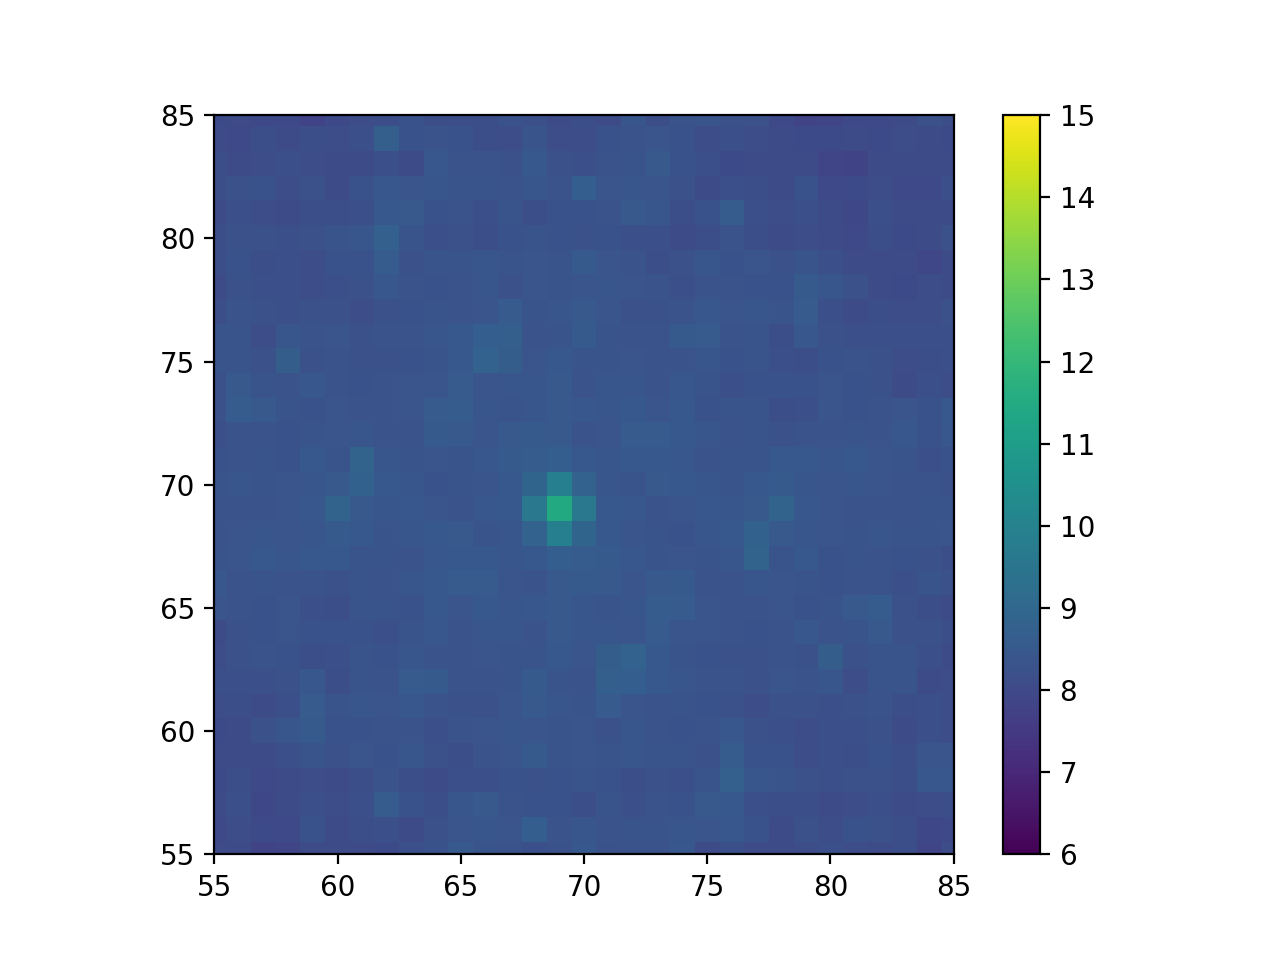

/tmp/ipykernel_1783879/976874085.py:2: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(a/np.size(square,0)),vmin=6,vmax=15)


<IPython.core.display.Javascript object>


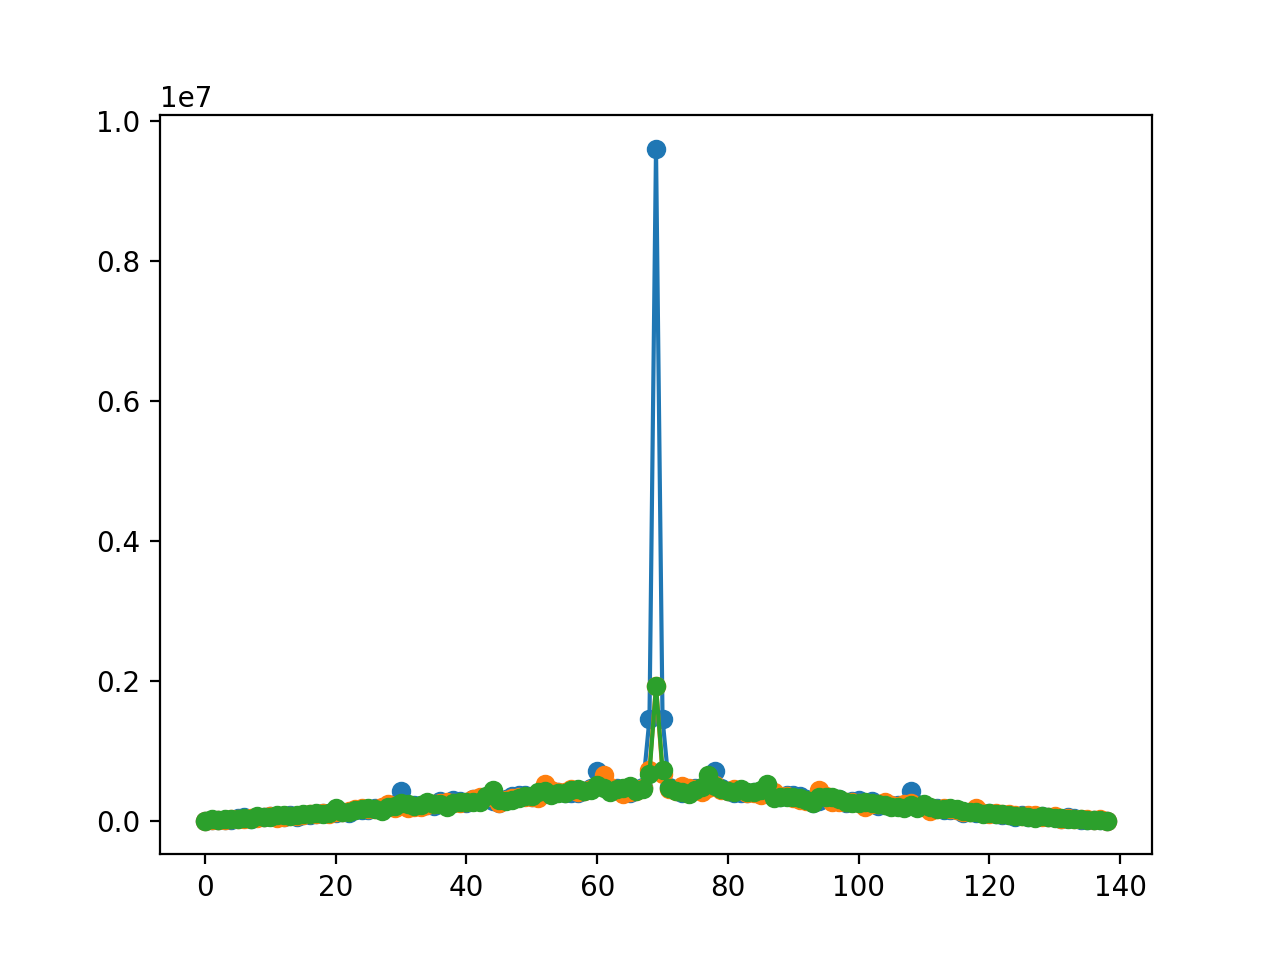

In [80]:
plt.figure()
plt.imshow(np.log(a/np.size(square,0)),vmin=6,vmax=15)
plt.colorbar()
plt.xlim(55,35+50)
plt.ylim(55,35+50)
plt.figure()
plt.plot(a[69,:],marker='o')
plt.plot(a[70,:],marker='o')
plt.plot(a[68,:],marker='o')

In [20]:
expname = 'xppl1001021'
run = 24
with h5py.File('/sdf/data/lcls/ds/xpp/{}/hdf5/smalldata/{}_Run{:04d}.h5'.format(expname, expname, run)) as f:
    data = f['Sums/jungfrau1M_alcove_calib_dropped_square'][:]
    print (f.keys())
#     print (f['Sums'].keys())
#     mask = f['UserDataCfg/epix_alc5/mask'][()] #this is the general mask we use for photonization   
#     droplet_mask = f['UserDataCfg/epix_alc5/ragged_droplet__ragged_droplet_droplet_mask'][()]
#     photons_j = f['epix_alc5/ragged_droplet_photon_j'][()]
#     photons_i = f['epix_alc5/ragged_droplet_photon_i'][()]
# #     diodes = f['lombpm']['channels'][()]
#     diodeU = f['diodeU']['channels'][:,3]

<KeysViewHDF5 ['Sums', 'UserDataCfg', 'adc', 'ai', 'damage', 'diode2', 'diodeU', 'ebeam', 'epics', 'epicsAll', 'epix_alc5', 'epix_alc5_env', 'event_time', 'evr', 'feeBld', 'fiducials', 'gas_detector', 'ipm2', 'ipm_hx2', 'jungfrau1M_alcove', 'lightStatus', 'lombpm', 'lomdiode', 'scan']>


In [21]:
x = np.load("/sdf/data/lcls/ds/xpp/xppx1003621/results/phsun/results/run053_mask.npy").astype(bool)

<IPython.core.display.Javascript object>


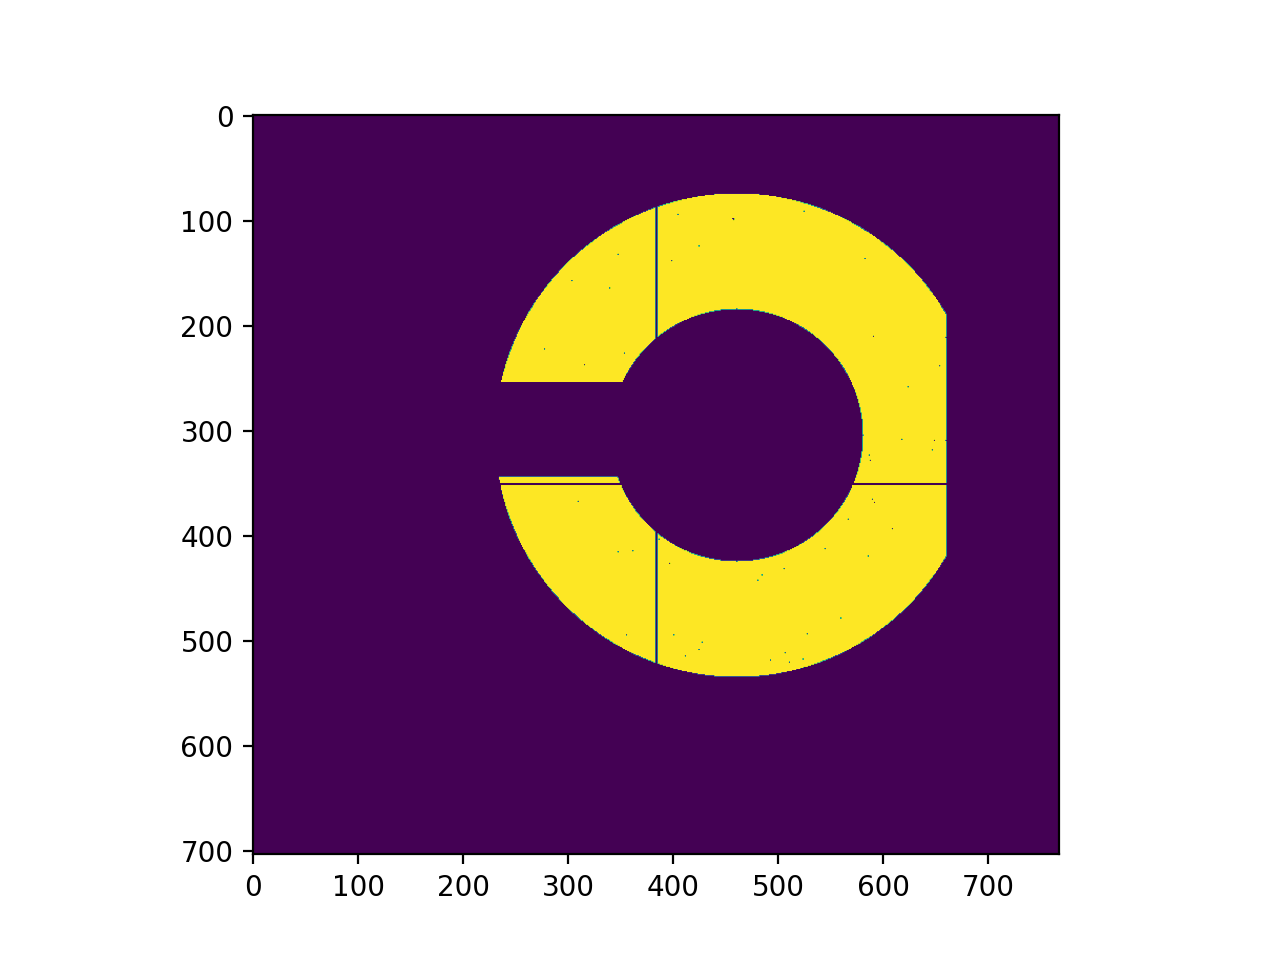

In [67]:
plt.figure()
plt.imshow(mask*droplet_mask)

In [60]:
shape = mask.shape
nframe = len(photons_i)
nframe = 120
imgs_reconstruct = np.zeros(np.r_[nframe, shape])
for i in tqdm(range(nframe)):
    imgs_reconstruct[i] = reconstruct_img(photons_i[i], photons_j[i], shape)

100%|██████████| 120/120 [00:00<00:00, 194.80it/s]


<IPython.core.display.Javascript object>


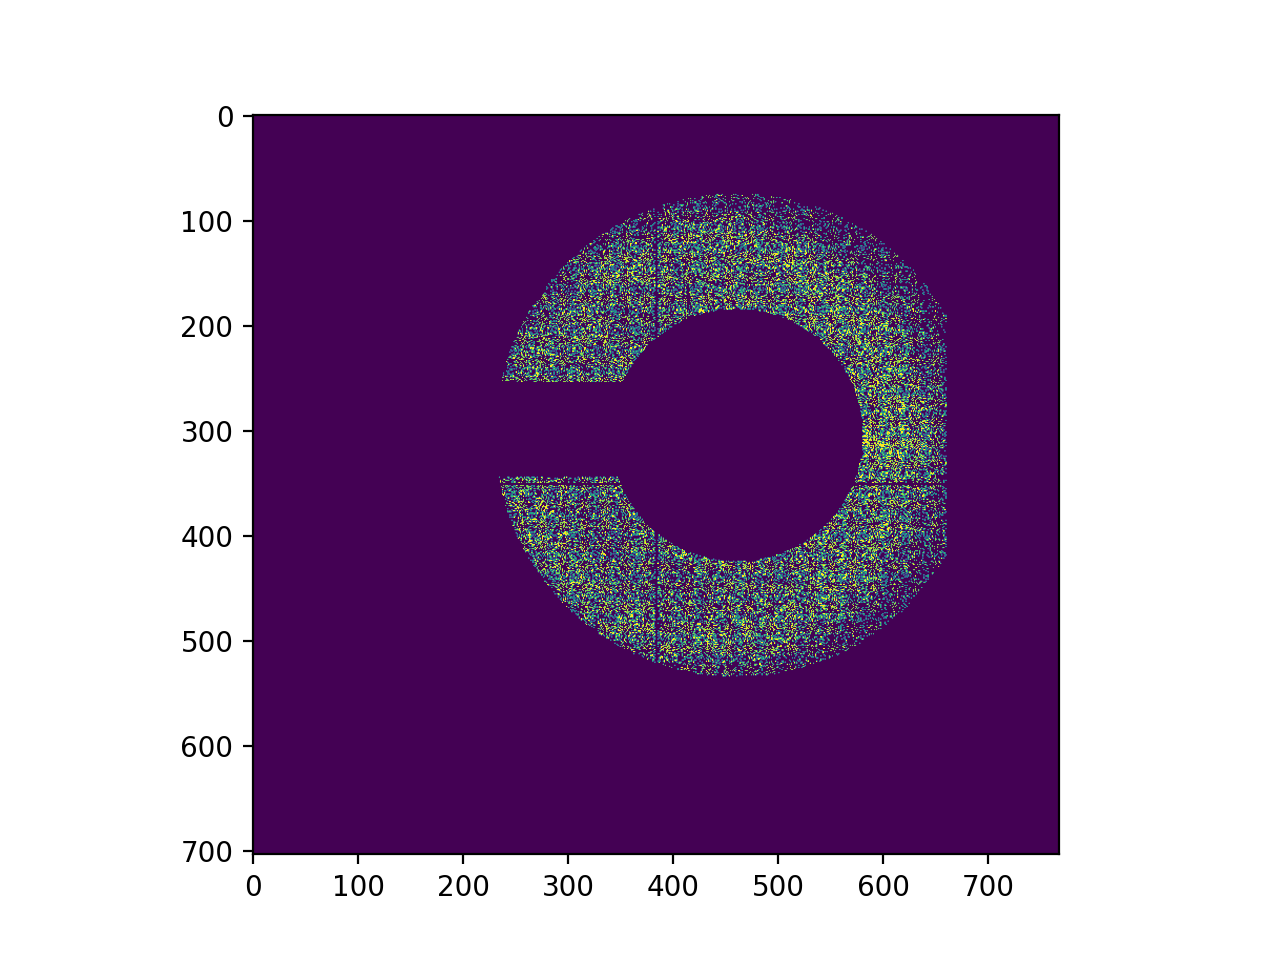

In [61]:
plt.figure()
plt.imshow(imgs_reconstruct.mean(axis = 0), vmin = 0, vmax = 0.01)
# center = [435, 310]
# ROI = getROI(mask.shape, center, rmin = 120, rmax = 250)
# plt.imshow(imgs_reconstruct.mean(axis = 0)* ROI,vmin = 0, vmax = 0.01)
# plt.colorbar()

<IPython.core.display.Javascript object>


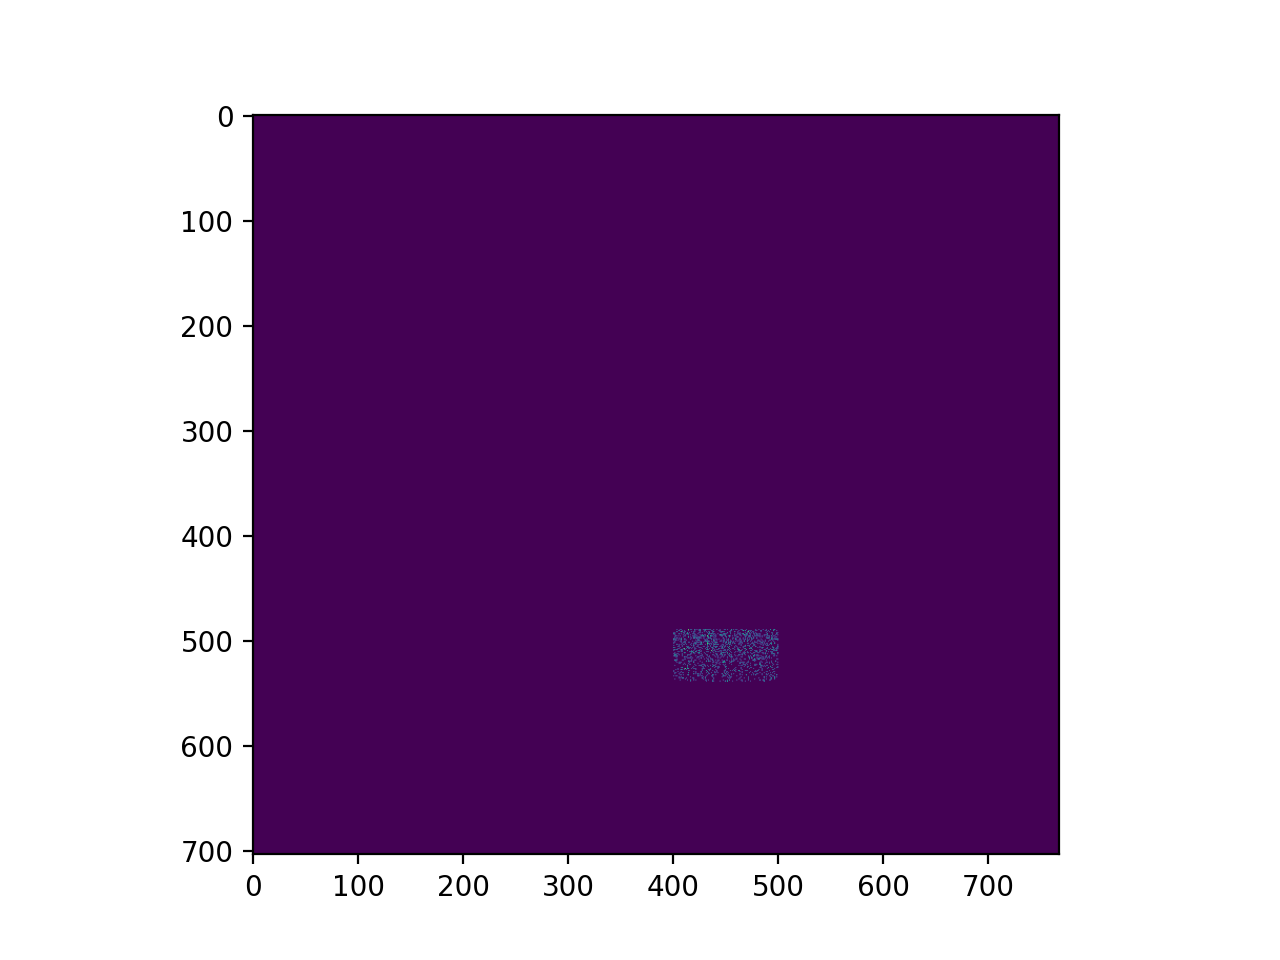

In [18]:
ROI = np.zeros_like(mask)
ROI[490:540, 400:500] = 1
ROI = ROI*mask
plt.figure()
plt.imshow(imgs_reconstruct.mean(axis = 0)* ROI)

In [19]:
nframe = len(photons_i)
ps = np.zeros((nframe, 12))

for i in tqdm(range(nframe)):
    ps[i] = np.squeeze(getProb_img(photons_i[i], photons_j[i], mask = ROI))

100%|██████████| 1691/1691 [00:06<00:00, 250.58it/s]


<IPython.core.display.Javascript object>


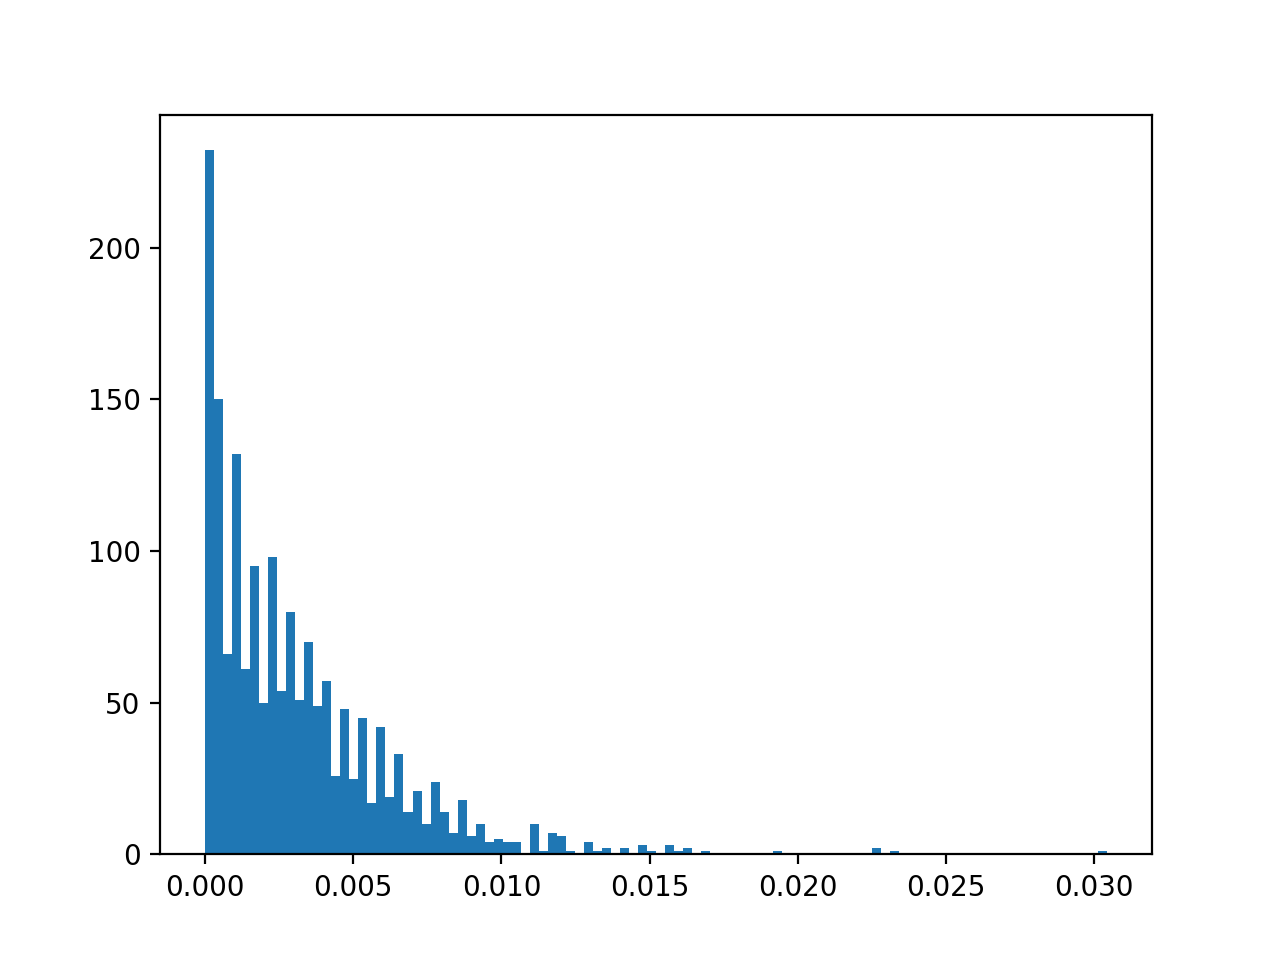

In [20]:
plt.figure()
plt.hist(ps[:, -1], bins = 100);

<IPython.core.display.Javascript object>


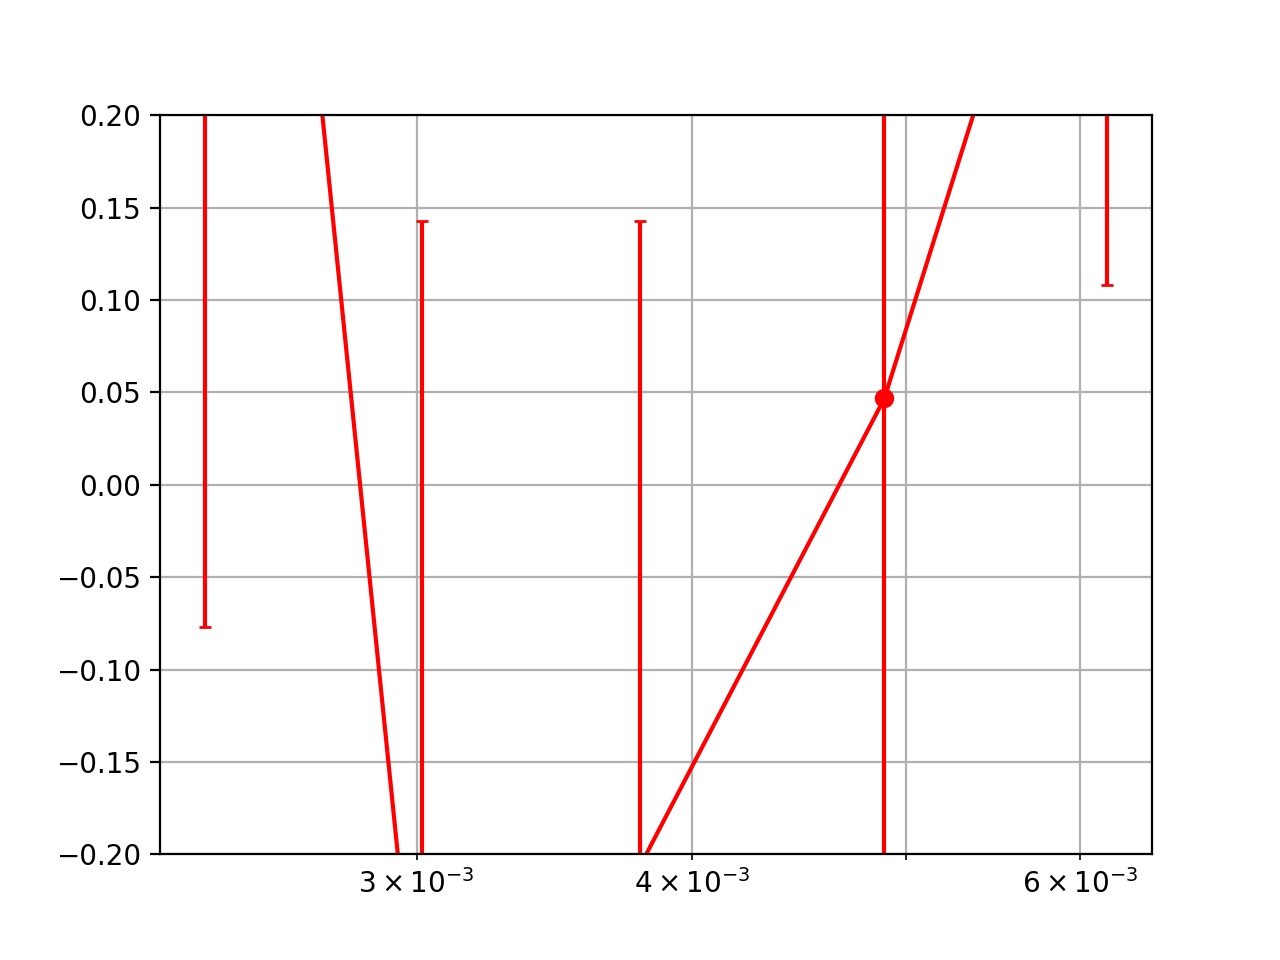

In [22]:
plt.figure()
kbar_bin, kbar_bin_error, ps_bin, ps_bin_error,  p2_shot_noise_error = \
intensity_influence_estimator(ps = ps[:,:3], kbar = ps[:,-1], branch_filter=np.ones((nframe), dtype = 'int'), nroi = ROI.sum(),\
                              label = '', \
                              binmin =0.001, binmax = 0.1,  nbin_edge = 20, color = 'r')
plt.xscale('log')
plt.ylim(-0.2, 0.2)
plt.grid('on', which = 'both')

In [23]:
kbar = ps[:,-1].copy()
w = np.where((kbar>0.001) & (kbar<0.1))[0]
betas, chi2, beta, delta_beta = \
getContrast(ps = ps[w, :3], kbar = ps[w,-1], npx=  ROI.sum())

/sdf/data/lcls/ds/xpp/xppl1001021/results/yanwen/utilities.py:87: RuntimeWarning: divide by zero encountered in divide
  return -2*np.nansum(ps*npx*np.log(p_dist(beta, kbar)/ps))
/sdf/data/lcls/ds/xpp/xppl1001021/results/yanwen/utilities.py:87: RuntimeWarning: invalid value encountered in multiply
  return -2*np.nansum(ps*npx*np.log(p_dist(beta, kbar)/ps))


In [24]:
print (beta, delta_beta)
kbar_mean = np.nanmean(kbar)
print (kbar_mean)

0.018000000000000016 0.0777804966613868
0.0031281429270784687


In [ ]:
np.savez('data/run_{}'.format(run), beta = beta, delta_beta = delta_beta, kbar_mean = kbar_mean)